# 2. Data Visualization
In this notebook we will use our extracted data and visualize it. For that purpose, we are importing function from our ```modules``` folder.

## 2.1 Libraries

We import the necessary libraries, including our own library in the modules file

In [1]:
# Warnings
import warnings
warnings.filterwarnings("ignore")

# Basic Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import seaborn as sns
from scipy import stats
from functools import reduce

# Statsmodels
import statsmodels.api as sm
import pmdarima as pmd
from pmdarima.arima import auto_arima
from statsmodels.tsa.api import VAR
from statsmodels.tsa.vector_ar.var_model import VARResults
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

# Machine Learning models
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, TimeSeriesSplit
from sklearn.linear_model import Ridge, Lasso, ElasticNet, ElasticNetCV, LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    mean_absolute_percentage_error,
    median_absolute_error,
    r2_score,
    precision_score

)

from xgboost import XGBRegressor

In [2]:
# We import our own functions
import sys
sys.path.append('../')  # Move two levels up to the project root
from modules.functions import *

## 2.2 Loading dataframe

In [3]:
df = pd.read_csv('../input/df.csv', parse_dates=['Fecha'], index_col='Fecha')
df.head()

,Índice de precios Lima Metropolitana (var% mensual) - IPC,Índice de precios Lima Metropolitana (var% mensual) - IPC Transables,Índice de precios Lima Metropolitana (var% mensual) - IPC No Transables,Índice de precios Lima Metropolitana (var% mensual) - IPC Subyacente,Índice de precios Lima Metropolitana (var% mensual) - IPC No Subyacente,Índice de precios Lima Metropolitana (var% mensual) - IPC Alimentos y Energía,Índice de precios Lima Metropolitana (var% mensual) - IPC Sin Alimentos y Energía,Índice de precios Lima Metropolitana (var% mensual) - IPC Alimentos y Bebidas,Índice de precios Lima Metropolitana (var% mensual) - IPC sin Alimentos y Bebidas,Índice de precios Lima Metropolitana (var% mensual) - IPC Subyacente Sin Alimentos y Bebidas,Índice de precios Lima Metropolitana (var% mensual) - IPC Importado,Índice de precios Lima Metropolitana (var% mensual) - Índice de Precios al por Mayor,Tasas de interés del Banco Central de Reserva - Tasa de Encaje,Tasas de interés del Banco Central de Reserva - Tasa de Referencia de la Política Monetaria,Emisión primaria y multiplicador (millones S/) - Circulante Desestacionalizado,Liquidez internacional del BCRP - RIN - Reservas Internacionales Netas (millones US$),Remuneraciones - Remuneración Mínima Vital - Índice Real (base 1994 = 100)
Fecha,,,,,,,,,,,,,,,,,
2003-10-01,0.049032,-0.035055,0.096153,-0.040038,0.164730,0.193699,-0.070649,0.198413,-0.040003,-0.132041,0.183697,0.171749,10.349944,2.75,0.010225,0.005542,0.056953
2003-11-01,0.167685,0.243529,0.120950,0.125742,0.237966,0.256361,0.005988,0.396040,-0.082393,0.088930,0.166302,0.190676,11.690608,2.50,0.011445,0.050288,-0.001674
2003-12-01,0.563951,0.594507,0.534926,0.127343,1.196907,0.898519,0.231768,0.986193,0.242505,0.078004,0.306233,0.649838,11.391178,2.50,0.016607,-0.010532,-0.005608
2004-01-01,0.537447,0.265543,0.708509,-0.055834,1.379067,1.132403,-0.141462,1.074219,0.076551,-0.081012,3.494166,0.545590,10.634030,2.50,0.019490,0.036233,-0.005346
2004-02-01,1.086085,0.987935,1.165375,0.239166,2.322395,1.881973,0.150952,2.028986,0.250387,0.192297,2.253270,1.274425,10.718295,2.50,0.017003,-0.005743,-0.010744


In [4]:
# New column names
columns = {
    'Índice de precios Lima Metropolitana (var% mensual) - IPC': 'IPC',
    'Índice de precios Lima Metropolitana (var% mensual) - IPC Transables': 'IPC Transables',
    'Índice de precios Lima Metropolitana (var% mensual) - IPC No Transables': 'IPC No Transables',
    'Índice de precios Lima Metropolitana (var% mensual) - IPC Subyacente': 'IPC Subyacente',
    'Índice de precios Lima Metropolitana (var% mensual) - IPC No Subyacente': 'IPC No Subyacente',
    'Índice de precios Lima Metropolitana (var% mensual) - IPC Alimentos y Energía': 'IPC Alimentos y Energía',
    'Índice de precios Lima Metropolitana (var% mensual) - IPC Sin Alimentos y Energía': 'IPC Sin Alimentos y Energía',
    'Índice de precios Lima Metropolitana (var% mensual) - IPC Alimentos y Bebidas': 'IPC Alimentos y Bebidas',
    'Índice de precios Lima Metropolitana (var% mensual) - IPC sin Alimentos y Bebidas': 'IPC sin Alimentos y Bebidas',
    'Índice de precios Lima Metropolitana (var% mensual) - IPC Subyacente Sin Alimentos y Bebidas': 'IPC Subyacente Sin Alimentos y Bebidas',
    'Índice de precios Lima Metropolitana (var% mensual) - IPC Importado': 'IPC Importado',
    'Índice de precios Lima Metropolitana (var% mensual) - Índice de Precios al por Mayor': 'Índice de Precios al por Mayor',
    'Tasas de interés del Banco Central de Reserva  - Tasa de Encaje': 'Tasa de Encaje',
    'Tasas de interés del Banco Central de Reserva  - Tasa de Referencia de la Política Monetaria': 'Tasa de Referencia Política Monetaria',
    'Emisión primaria y multiplicador (millones S/) - Circulante Desestacionalizado': 'Emisión Primaria y Multiplicador',
    'Liquidez internacional del BCRP - RIN - Reservas Internacionales Netas (millones US$)': 'RIN - Reservas Internacionales Netas',
    'Remuneraciones - Remuneración Mínima Vital - Índice Real (base 1994 = 100)': 'Remuneración Mínima Vital - Índice Real'
}

# We rename the columns so they are easier to analyse
df.rename(columns=columns, inplace=True)


## 2.3 Getting correlations

First, we obtain the correlations between the Consumer Price Index (IPC) and all the variables

In [5]:
corr = df.corr()['IPC']
pd.DataFrame(corr)

,IPC
IPC,1.000000
IPC Transables,0.444786
IPC No Transables,0.931717
IPC Subyacente,0.561022
IPC No Subyacente,0.924906
IPC Alimentos y Energía,0.923260
IPC Sin Alimentos y Energía,0.517116
IPC Alimentos y Bebidas,0.878027
IPC sin Alimentos y Bebidas,0.572228
IPC Subyacente Sin Alimentos y Bebidas,0.502310


Then, we obtain the correlations between the Core Consumer Price Index (IPC Alimentos y Energía) and all the variables

In [6]:
corr = df.corr()['IPC Alimentos y Energía']
pd.DataFrame(corr)

,IPC Alimentos y Energía
IPC,0.923260
IPC Transables,0.433535
IPC No Transables,0.851552
IPC Subyacente,0.330254
IPC No Subyacente,0.944156
IPC Alimentos y Energía,1.000000
IPC Sin Alimentos y Energía,0.161762
IPC Alimentos y Bebidas,0.945005
IPC sin Alimentos y Bebidas,0.318616
IPC Subyacente Sin Alimentos y Bebidas,0.217705


## 2.4 Visualizing correlations

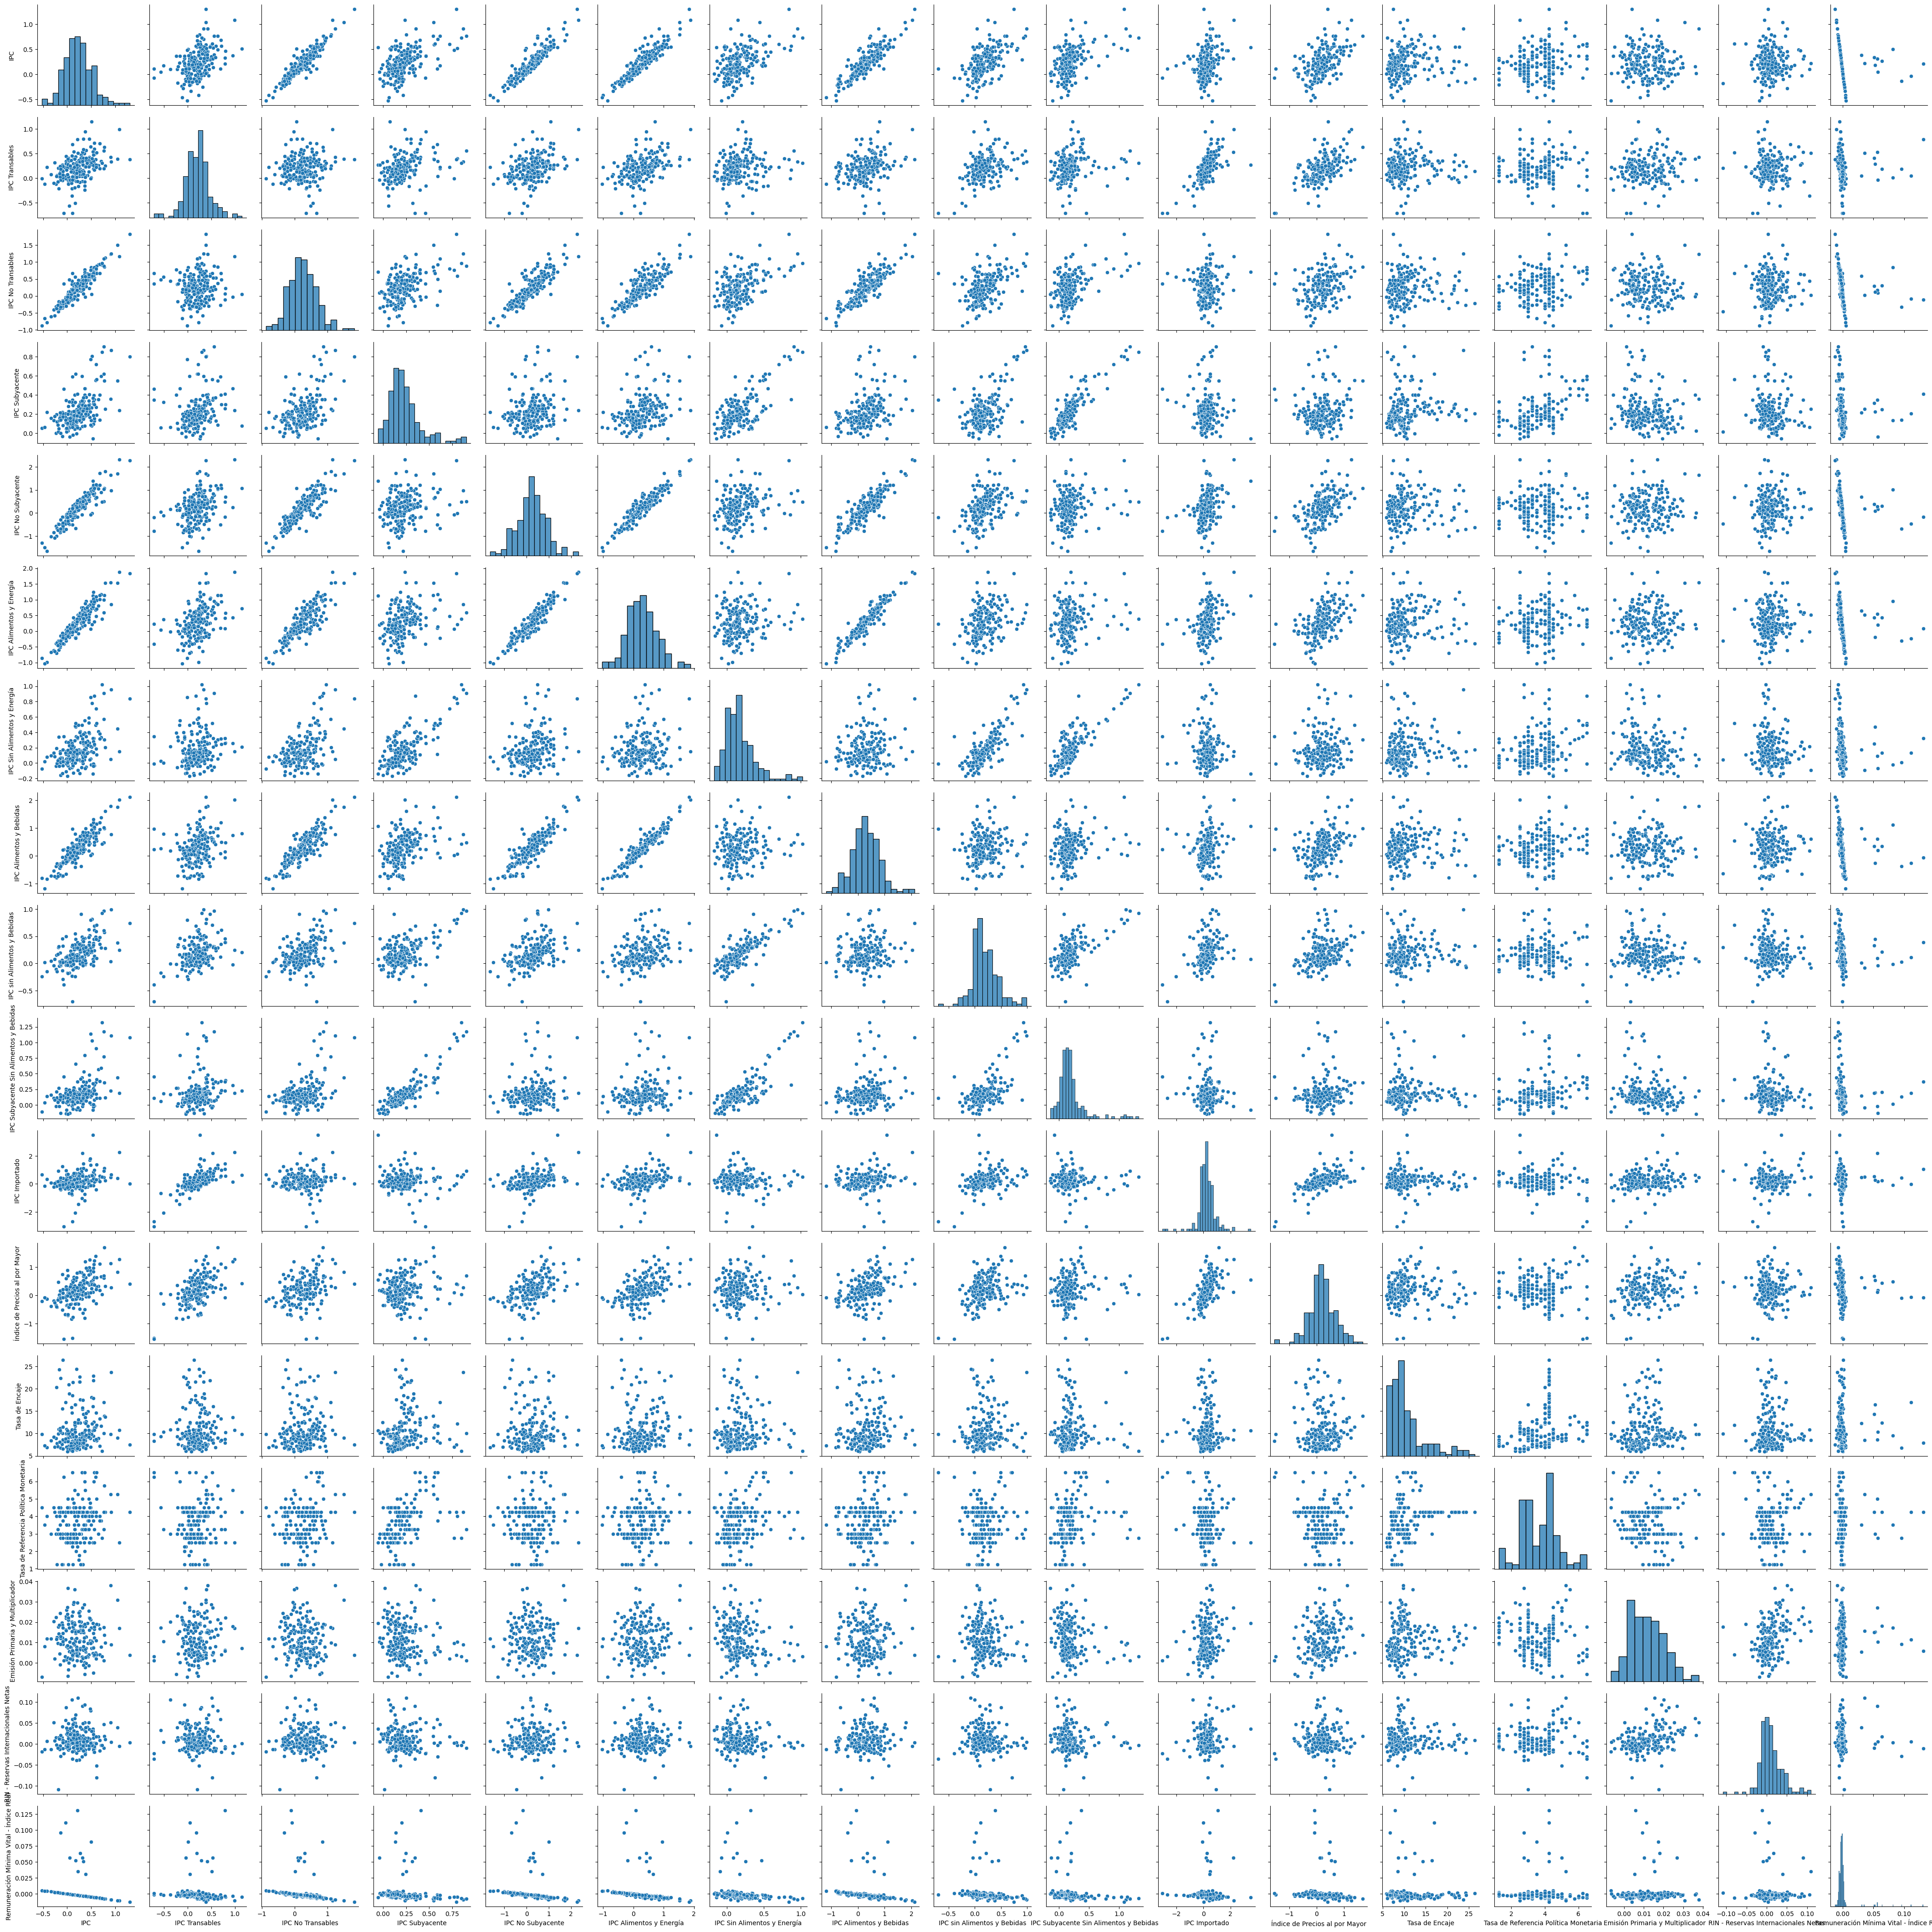

In [7]:
sns.pairplot(df)
plt.tight_layout(pad=1.0)
plt.savefig('../output/data_visualization/pairplot.png')

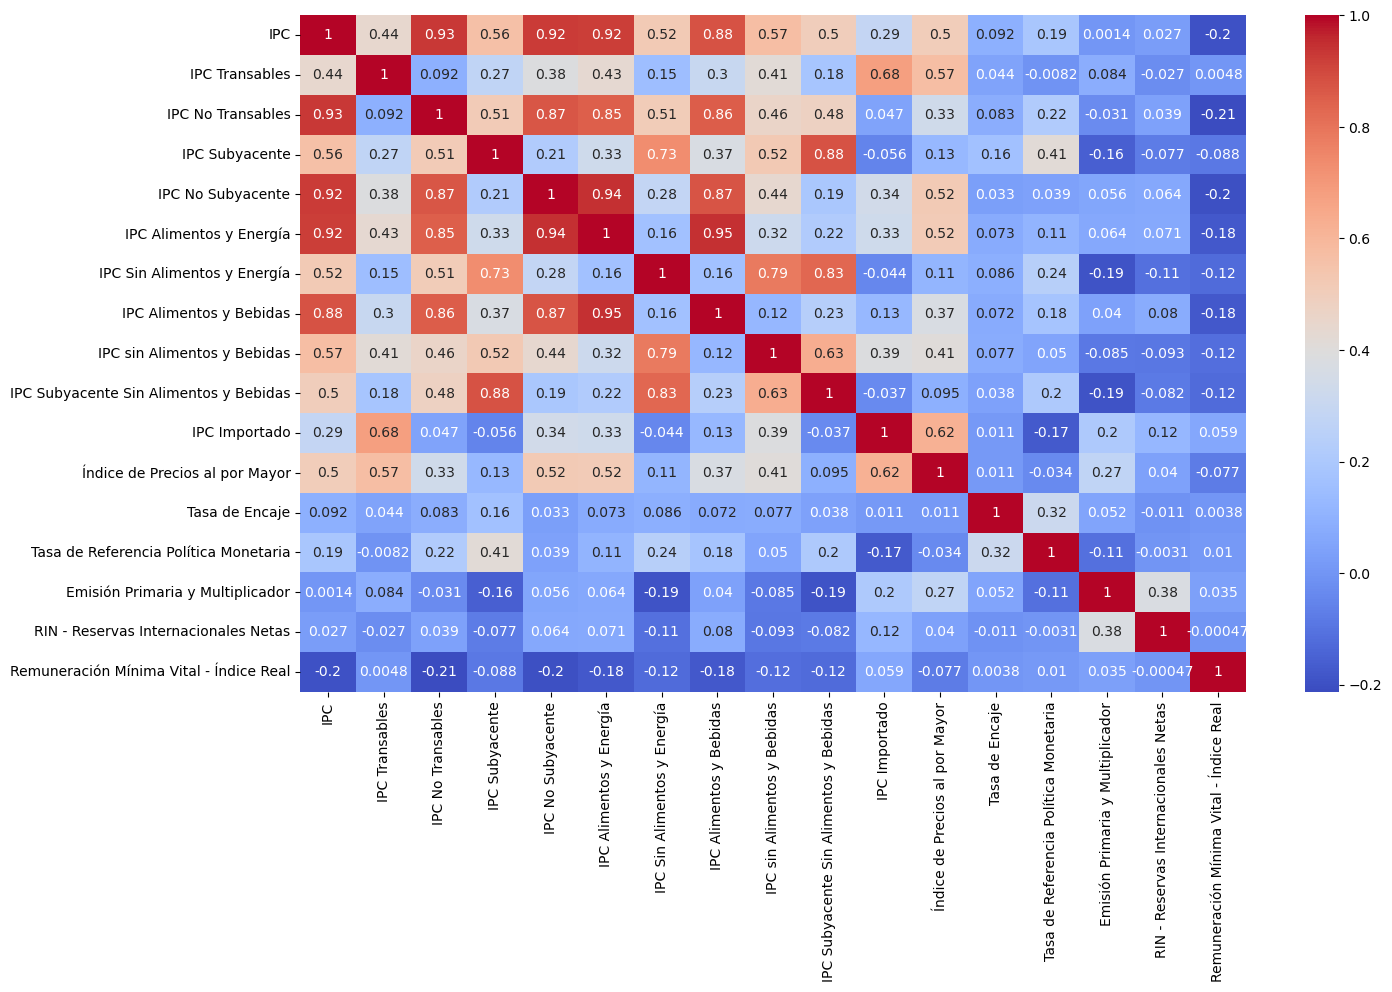

In [8]:
corr = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.tight_layout(pad=1.0)
plt.savefig('../output/data_visualization/heatmap.png')